## Binary Model 5: Logistic Regression 

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
# Import Data
df = pd.read_csv('binary_for_models.csv')
df.head()

,Unnamed: 0,amount_tsh,days_since_recorded,funder,gps_height,installer,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type,status_group
0,0,6000.0,995,other,1390,other,Lake Nyasa,109,True,VWC,False,1990s,gravity,annually,soft,enough,spring,communal standpipe,functional
1,1,0.0,272,other,1399,other,Lake Victoria,280,unknown,other,True,2010s,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,2,25.0,281,other,686,other,Pangani,250,True,VWC,True,2000s,gravity,per bucket,soft,enough,dam,communal standpipe multiple,functional
3,3,0.0,309,unicef,263,other,Ruvuma / Southern Coast,58,True,VWC,True,1980s,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple,needs repair
4,4,0.0,874,other,0,other,Lake Victoria,0,True,other,True,unknown,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
# Split the target outcome from the features
target = df['status_group']
train_df = df.drop('status_group', axis=1)
train_df.head()

,amount_tsh,days_since_recorded,funder,gps_height,installer,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type
0,6000.0,995,other,1390,other,Lake Nyasa,109,True,VWC,False,1990s,gravity,annually,soft,enough,spring,communal standpipe
1,0.0,272,other,1399,other,Lake Victoria,280,unknown,other,True,2010s,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,25.0,281,other,686,other,Pangani,250,True,VWC,True,2000s,gravity,per bucket,soft,enough,dam,communal standpipe multiple
3,0.0,309,unicef,263,other,Ruvuma / Southern Coast,58,True,VWC,True,1980s,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple
4,0.0,874,other,0,other,Lake Victoria,0,True,other,True,unknown,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe


In [5]:
# One hot encode
train_df = pd.get_dummies(train_df)
train_df.head()

,amount_tsh,days_since_recorded,gps_height,population,funder_danida,funder_gov,funder_hesawa,funder_kkkt,funder_other,funder_rwssp,...,source_shallow well,source_spring,source_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,6000.0,995,1390,109,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,0.0,272,1399,280,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,25.0,281,686,250,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,309,263,58,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,874,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df, target, random_state=42)

In [7]:
logreg = LogisticRegression(solver='sag', max_iter=1000, random_state=42, multi_class='multinomial')
logreg.fit(X_train, y_train)

log_predict = logreg.predict(X_test)

/Users/aliciafeuling/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [8]:
print(classification_report(y_test, log_predict))

              precision    recall  f1-score   support

  functional       0.55      0.99      0.70      8098
needs repair       0.46      0.01      0.01      6752

    accuracy                           0.54     14850
   macro avg       0.50      0.50      0.36     14850
weighted avg       0.51      0.54      0.39     14850



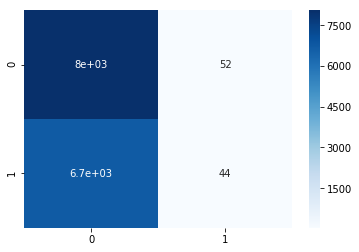

In [9]:
sns.heatmap(confusion_matrix(y_test, log_predict), annot=True, cmap='Blues')